In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [10]:
# constants
# create mesh
n_spatial_locs = 11  # define number of grid points along 1D line
n_time_pts = 1000  # number of time points
particle_start_loc = 5  # starting position for molecules
line_length = 4  # total length of diffusion line (um)
n_particles = 50  # number of molecules

In [11]:
def combine_runs(n_runs, path):
    
    # initialize array to store all runs
    runs = np.zeros((n_runs, n_spatial_locs, n_time_pts))
    
    # loop through runs
    for i in range(n_runs):
            
        # store run in array
        runs[i, :, :] = np.loadtxt(path.format(f'{i:03}'),
                    delimiter=",")
    
    # return array of all runs
    return runs    

In [12]:
def get_stats(n_runs, path):
    
    # combine runs
    runs = combine_runs(n_runs, path)
    
    # get mean and std
    mean = np.mean(runs, axis=0)
    std = np.std(runs, axis=0)
    
    # return mean and std
    return mean, std, runs

In [20]:
RW_DIR = '../../data/eme-validation/random-walk/20230118_192600/rw-run-{}.csv'
#EME_DIR = '../../data/eme-validation/markov-eme/20230118_192600/eme-run-{}.csv'
EME_DIR = '../../data/eme-validation/markov-eme/factorsqrt2/20230330_151651/eme-run-{}.csv'

#factor2/20230330_151605/eme-run-{}.csv'

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0. 

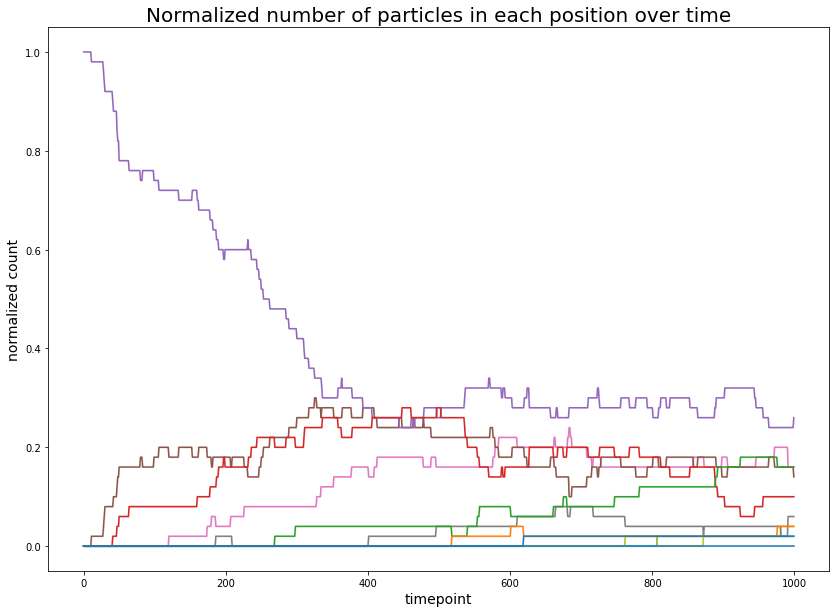

In [27]:
#TODO: cleanup repetitive code
def plot_multiruns(n_runs):
    # get data 
    rw_mean, rw_std, rw_runs = get_stats(n_runs, RW_DIR)
    eme_mean, eme_std, eme_runs = get_stats(n_runs, EME_DIR)
    #mcmc_mean, mcmc_std, mcmc_runs = get_stats(n_runs, '../../data/eme-validation/markov-mcmc-eme/20230207_174420/mcmc-eme-run-{}.csv')
    
    #print(eme_std)
    
    plt.figure(figsize=(14, 10))
    
    # plot particle counts for each position for each run
    
    # get list of colors 
    colors = plt.cm.tab10_r(np.linspace(0, 1, n_spatial_locs))
            
    # plot mean and std
    for i in range(n_spatial_locs):
        
        # plot mean
        #plt.plot(list(range(n_time_pts)), rw_mean[i, :], color=colors[i])
        plt.plot(list(range(n_time_pts)), eme_mean[i, :], color=colors[i])
        #plt.plot(list(range(n_time_pts)), mcmc_mean[i, :], color=colors[i])
        print(eme_mean[i, :])
        print(eme_std[i, :])
        
        # plot std
        #plt.fill_between(
        #    list(range(n_time_pts)), 
        #    rw_mean[i, :]+rw_std[i, :],
        #    rw_mean[i, :]-rw_std[i, :],
        #    alpha=0.2,
        #    color=colors[i]
        #    )
        
        plt.fill_between(
            list(range(n_time_pts)), 
            eme_mean[i, :]+eme_std[i, :],
            eme_mean[i, :]-eme_std[i, :],
            alpha=0.2,
            color=colors[i]
            )
        
        '''
        plt.fill_between(
            list(range(n_time_pts)), 
            mcmc_mean[i, :]+mcmc_mean[i, :],
            mcmc_mean[i, :]-mcmc_mean[i, :],
            alpha=0.2,
            color=colors[i]
            )
            '''

    plt.title(
        "Normalized number of particles in each position over time",
        fontsize=20,
    )
    plt.xlabel("timepoint", fontsize=14)
    plt.ylabel("normalized count", fontsize=14)
    #plt.legend(list(range(n_spatial_locs)))
    plt.show()
    
plot_multiruns(100)